In [81]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import pandas as pd
import spacy
import pickle

from gensim.models import CoherenceModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary, MmCorpus
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
import seaborn as sns
%matplotlib inline

In [2]:
sdf = pd.read_csv('subreddits.csv')
subreddits = sdf.values.tolist()

In [3]:
for s in subreddits[1:4]:
    sub = str(s)[5:-5]
    print('sub', sub)     

    temp_df = pd.read_csv(f'./data/reddit/cm/{sub}_comments.csv')
    temp_serie = temp_df.Comment
    if s == subreddits[0]:
        serie = temp_serie
    else:
        serie = temp_serie.append(temp_serie, ignore_index=True)

sub exredpill
sub RedPillParenting
sub redpillbooks


In [4]:
serie.head()

0    http://www.returnofkings.com/9544/the-author-w...
1    No doubt - you are correct. His work and the w...
2    1. **What's it about?**  \nA how to guide for ...
3    1. **What's it about?**  \nThe journey of Neil...
4    1. **What's it about?**  \nThe reflections of ...
Name: Comment, dtype: object

In [5]:
serie.shape

(3920,)

In [6]:
serie = serie[serie != '[deleted]']

In [7]:
serie.shape

(3600,)

In [8]:
serie.to_csv("./data/reddit/cm/all_comments.csv")

## Pre-processing data

In [9]:
nlp = spacy.load("en")

In [26]:
my_stop_words = [u'say', u'\s', u'Mr', u'be', u'said', u'says', u'saying', u's', u'’s', u'\n\n', '\n', ' \n']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [27]:
stl= pd.Series.tolist(serie)

In [28]:
texts, article, skl_texts = [], [], []
for comment in stl:
    try:
        doc = nlp(comment)
    except:
        continue
    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article!
        if not w.is_stop and not w.is_punct and not w.like_num:
            # we add the lematized version of the word
            article.append(w.lemma_)
        # assume each comment as a document
        if w.text == doc[-1].text:
            skl_texts.append(' '.join(article))
            texts.append(article)
            article = []

In [106]:
type(texts)

list

In [130]:
with open("texts.txt", "wb") as fp:   #Pickling
   pickle.dump(texts, fp)

In [131]:
with open("texts.txt", "rb") as fp:   # Unpickling
    texts2 = pickle.load(fp)

In [31]:
bigram = gensim.models.Phrases(texts)

In [32]:
texts = [bigram[line] for line in texts]

In [33]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [34]:
dictionary

In [35]:
corpus[6][0:10]

[(11, 1),
 (51, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1)]

## HDP

In [38]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [133]:
hdpmodel.show_topics(num_topics=5)

[(0,
  '0.008*man + 0.008*book + 0.004*woman + 0.004*  + 0.004*think + 0.004*know + 0.004*like + 0.003*good + 0.003*thing + 0.003*fuck + 0.003*people + 0.003*read + 0.003*way + 0.003*shit + 0.003*want + 0.002*work + 0.002*time + 0.002*argue + 0.002*life + 0.002*talk'),
 (1,
  '0.011* \n + 0.005*book + 0.003*think + 0.003*thing + 0.002*read + 0.002*like + 0.002*feel + 0.002*life + 0.002*go + 0.001*art + 0.001*woman + 0.001*time + 0.001*way + 0.001*good + 0.001*Social + 0.001*point + 0.001*masculinity + 0.001*start + 0.001*man + 0.001* \n\n\n   '),
 (2,
  '0.005*book + 0.003*man + 0.003*read + 0.003*gt + 0.002*like + 0.002*  + 0.002*think + 0.002*life + 0.002*time + 0.002*good + 0.002*people + 0.002*suffering + 0.001*opinion + 0.001*feel + 0.001*RP + 0.001*woman + 0.001*thing + 0.001*different + 0.001*person + 0.001*find'),
 (3,
  '0.006*book + 0.004*read + 0.002*good + 0.002*like + 0.002*find + 0.002*thing + 0.001* \n  \n + 0.001*want + 0.001*people + 0.001*man + 0.001* \n + 0.001*woman

In [46]:
hdpmodel.save('hdp_model.gensim')

In [49]:
hdp2 = HdpModel.load('hdp_model.gensim')

In [75]:
dictionary.save("hdp_dictionary..dict")

In [76]:
dictionary2 = Dictionary.load("hdp_dictionary..dict")

In [89]:
print(type(dictionary))
print(type(dictionary2))

<class 'gensim.corpora.dictionary.Dictionary'>
<class 'gensim.corpora.dictionary.Dictionary'>


In [80]:
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)

In [83]:
corpus2 = MmCorpus('/tmp/deerwester.mm')

In [54]:
hdp2.show_topics(num_topics=4)

[(0,
  '0.008*man + 0.008*book + 0.004*woman + 0.004*  + 0.004*think + 0.004*know + 0.004*like + 0.003*good + 0.003*thing + 0.003*fuck + 0.003*people + 0.003*read + 0.003*way + 0.003*shit + 0.003*want + 0.002*work + 0.002*time + 0.002*argue + 0.002*life + 0.002*talk'),
 (1,
  '0.011* \n + 0.005*book + 0.003*think + 0.003*thing + 0.002*read + 0.002*like + 0.002*feel + 0.002*life + 0.002*go + 0.001*art + 0.001*woman + 0.001*time + 0.001*way + 0.001*good + 0.001*Social + 0.001*point + 0.001*masculinity + 0.001*start + 0.001*man + 0.001* \n\n\n   '),
 (2,
  '0.005*book + 0.003*man + 0.003*read + 0.003*gt + 0.002*like + 0.002*  + 0.002*think + 0.002*life + 0.002*time + 0.002*good + 0.002*people + 0.002*suffering + 0.001*opinion + 0.001*feel + 0.001*RP + 0.001*woman + 0.001*thing + 0.001*different + 0.001*person + 0.001*find'),
 (3,
  '0.006*book + 0.004*read + 0.002*good + 0.002*like + 0.002*find + 0.002*thing + 0.001* \n  \n + 0.001*want + 0.001*people + 0.001*man + 0.001* \n + 0.001*woman

## pyLDAvis

In [57]:
vis_hdp = hdpmodel.suggested_lda_model()
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(vis_hdp, corpus, dictionary)

PreparedData(topic_coordinates=                  x         y  topics  cluster       Freq
topic                                                    
0      2.005251e-04 -0.000216       1        1  32.363565
2      8.034881e-05 -0.000136       2        1   6.398933
1      9.548781e-05  0.000307       3        1   5.807230
3     -1.239648e-04  0.000310       4        1   5.597725
4     -2.919106e-04 -0.000023       5        1   1.769805
12    -5.975280e-05 -0.000115       6        1   1.598111
9     -2.732226e-04  0.000138       7        1   1.518960
7     -5.152954e-06 -0.000057       8        1   1.040635
16     4.421201e-04  0.000186       9        1   1.021634
5     -3.002910e-04 -0.000321      10        1   0.997675
20     2.011835e-04 -0.000066      11        1   0.915667
10     9.578404e-05 -0.000004      12        1   0.901364
24    -8.746609e-07  0.000010      13        1   0.864232
6     -2.247214e-04  0.000204      14        1   0.854607
8     -1.915696e-04 -0.000029      15        1   0.806945
31     1.958758e-04  0.000159      16        1   0.733509
37    -1.448533e-04 -0.000190      17        1   0.645564
15     7.424955e-05 -0.000231      18        1   0.637208
18     3.082244e-04 -0.000159      19        1   0.597862
48     2.450659e-04  0.000043      20        1   0.573341
11     8.545271e-06 -0.000220      21        1   0.568007
26    -9.710866e-05  0.000065      22        1   0.560970
21    -4.473401e-05 -0.000063      23        1   0.552445
98    -8.495849e-05 -0.000011      24        1   0.501972
35     4.883955e-05 -0.000042      25        1   0.496839
87    -3.241963e-04 -0.000163      26        1   0.495070
27     1.803746e-04  0.000133      27        1   0.471596
44    -2.585249e-05 -0.000268      28        1   0.466512
13     2.534114e-04  0.000253      29        1   0.451478
39     5.759371e-06 -0.000297      30        1   0.446113
...             ...       ...     ...      ...        ...
109    1.516084e-04  0.000344     121        1   0.184388
59     2.284771e-04  0.000094     122        1   0.179999
45    -3.543240e-04  0.000180     123        1   0.179139
92     2.086664e-04 -0.000043     124        1   0.177790
52    -2.757609e-04 -0.000162     125        1   0.172841
130    3.427724e-04  0.000063     126        1   0.172358
104   -2.100896e-04  0.000186     127        1   0.170603
113   -1.773107e-04  0.000069     128        1   0.170098
107    4.081106e-05  0.000134     129        1   0.169166
89     1.945659e-04  0.000107     130        1   0.166454
126    3.184498e-04  0.000142     131        1   0.163444
131    8.950157e-05  0.000339     132        1   0.162684
110    1.775288e-05 -0.000178     133        1   0.161612
93     8.752586e-05 -0.000075     134        1   0.158346
134    2.415829e-04 -0.000042     135        1   0.158145
29     1.895221e-05 -0.000188     136        1   0.151579
102    4.492312e-05  0.000052     137        1   0.151176
101   -1.656815e-04  0.000240     138        1   0.146036
128   -9.639892e-06  0.000007     139        1   0.145022
121   -9.280504e-05  0.000004     140        1   0.144960
122    2.447821e-05  0.000039     141        1   0.140075
140   -2.695032e-04  0.000308     142        1   0.134891
118   -2.578853e-04 -0.000089     143        1   0.133288
57    -1.399878e-04 -0.000162     144        1   0.122136
116    1.977918e-05  0.000251     145        1   0.119656
99    -9.624075e-05 -0.000284     146        1   0.118241
144   -6.419980e-05 -0.000214     147        1   0.117057
138   -9.754336e-05 -0.000130     148        1   0.116501
115    1.384683e-05 -0.000026     149        1   0.109087
129    4.880893e-05 -0.000145     150        1   0.097773

[150 rows x 5 columns], topic_info=      Category       Freq                                               Term  \
2652   Default   9.000000                                             school   
724    Default   9.000000                                psychologypower.pdf   
5812   Default   9.000000              

## Topic Coherence

In [63]:
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

vis_hdp = [[word for word, prob in topic] for topicid, topic in vis_hdp.show_topics(formatted=False)]

In [64]:
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

vis_hdp_coherence = CoherenceModel(topics=vis_hdp, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [90]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    sns.set()
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

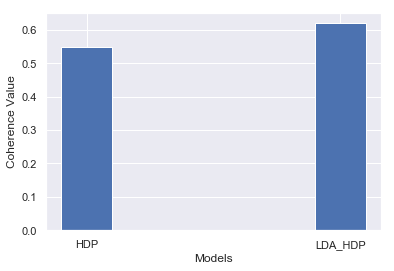

In [91]:
evaluate_bar_graph([hdp_coherence, vis_hdp_coherence],
                   ['HDP', 'LDA_HDP'])